In [14]:
import numpy as np

def sigmoid(x):
    return 1/(1+np.exp(x))

def numerical_derivative(f,x):
    dx=1e-4
    gradf=np.zeros_like(x)

    it = np.nditer(x, flags=['multi_index'], op_flags = ['readwrite'])

    while not it.finished:
        idx = it.multi_index
        tmp_val = x[idx]
        x[idx] = float((tmp_val)+dx)
        fx1 = f(x)

        x[idx] = float((tmp_val)-dx)
        fx2 = f(x)
        gradf[idx] = (fx1 - fx2)/(2*dx)

        x[idx] = tmp_val
        it.iternext()
    return gradf

In [15]:
class logicGate:
    def __init__(self, gate_name, xdata, tdata, learning_rate=0.01, threshold=0.5):
        self.name = gate_name

        self.__xdata = xdata.reshape(4,2)
        self.__tdata = tdata.reshape(4,1)

        self.__w = np.random.rand(2,1)
        self.__b = np.random.rand(1)

        self.__learning_rate = learning_rate
        self.__threshold = threshold

    def __loss_func(self):
        delta = 1e-7

        z=np.dot(self.__xdata, self.__w) + self.__b
        y=sigmoid(z)

        return -np.sum(self.__tdata*np.log(y+delta) + (1-self.__tdata) *np.log((1-y) + delta))

    def err_val(self):
        delta = 1e-7
        z=np.dot(self.__xdata, self.__w)+self.__b
        y = sigmoid(z)
        return -np.sum(self.__tdata +np.log(y+delta) + (1-self.__tdata)*np.log((1-y)+delta))

    def train(self):
        f = lambda x: self.__loss_func()
        print("init error: ", self.err_val())

        for stp in range(20000):
            self.__w -= self.__learning_rate * numerical_derivative(f, self.__w)
            self.__b -= self.__learning_rate * numerical_derivative(f, self.__b)
            if(stp % 2000==0):
                print("step: ", stp, "error: ", self.err_val())

    def predict(self, input_data):
        z=np.dot(input_data, self.__w) + self.__b
        y=sigmoid(z)

        if y[0] > self.__threshold:
            result = 1
        else:
            result = 0
        return y, result

In [16]:
xdata = np.array([[0,0],[0,1],[1,0],[1,1]])
tdata = np.array([[0,0,0,1]])

AND = logicGate("AND", xdata, tdata)
AND.train()
for in_data in xdata:
    (sig_val, logic_val) = AND.predict(in_data)
    print(in_data, "   :  ", logic_val)

init error:  4.996693176002061
step:  0 error:  4.991095611492061
step:  2000 error:  7.3763097924957215
step:  4000 error:  9.73817505967379
step:  6000 error:  11.401137403492932
step:  8000 error:  12.674335323959728
step:  10000 error:  13.702175562643973
step:  12000 error:  14.56223125674214
step:  14000 error:  15.300646852092536
step:  16000 error:  15.946977264356004
step:  18000 error:  16.521236861629326
[0 0]    :   0
[0 1]    :   0
[1 0]    :   0
[1 1]    :   1


In [17]:
xdata = np.array([[0,0],[0,1],[1,0],[1,1]])
tdata = np.array([[0,1,1,1]])

OR = logicGate("OR", xdata, tdata)
OR.train()
for in_data in xdata:
    (sig_val, logic_val) = OR.predict(in_data)
    print(in_data, "   :  ", logic_val)

init error:  3.325614847786835
step:  0 error:  3.2185637006074255
step:  2000 error:  -1.0735529105931985
step:  4000 error:  -0.6871506923857532
step:  6000 error:  -0.3819359657507514
step:  8000 error:  -0.14085019415887368
step:  10000 error:  0.056397740006910446
step:  12000 error:  0.22267128262754987
step:  14000 error:  0.3661181253263376
step:  16000 error:  0.49212196731025515
step:  18000 error:  0.6043954355147764
[0 0]    :   0
[0 1]    :   1
[1 0]    :   1
[1 1]    :   1


In [18]:
xdata = np.array([[0,0],[0,1],[1,0],[1,1]])
tdata = np.array([[0,1,1,0]])

XOR=logicGate("XOR", xdata, tdata)
XOR.train()

for in_data in xdata:
    (sig_val, logic_val) = XOR.predict(in_data)
    print(in_data, "  :  ", logic_val)

init error:  6.257685685308605
step:  0 error:  6.19031915574653
step:  2000 error:  2.1568332398637367
step:  4000 error:  2.158791455411941
step:  6000 error:  2.158878011089922
step:  8000 error:  2.15888171775411
step:  10000 error:  2.1588818762775412
step:  12000 error:  2.1588818830570835
step:  14000 error:  2.158881883346651
step:  16000 error:  2.158881883357209
step:  18000 error:  2.158881883357209
[0 0]   :   1
[0 1]   :   1
[1 0]   :   1
[1 1]   :   0


In [63]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

mnist = tf.keras.datasets.fashion_mnist
(image_train, label_train), (image_test, label_test) = fashion_mnist.load_data()
print("Train Image Shape : ", image_train.shape)
print("Train Label : ", label_train,"\n")
print(image_train[0])


Train Image Shape :  (60000, 28, 28)
Train Label :  [9 0 0 ... 3 0 5] 

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 1

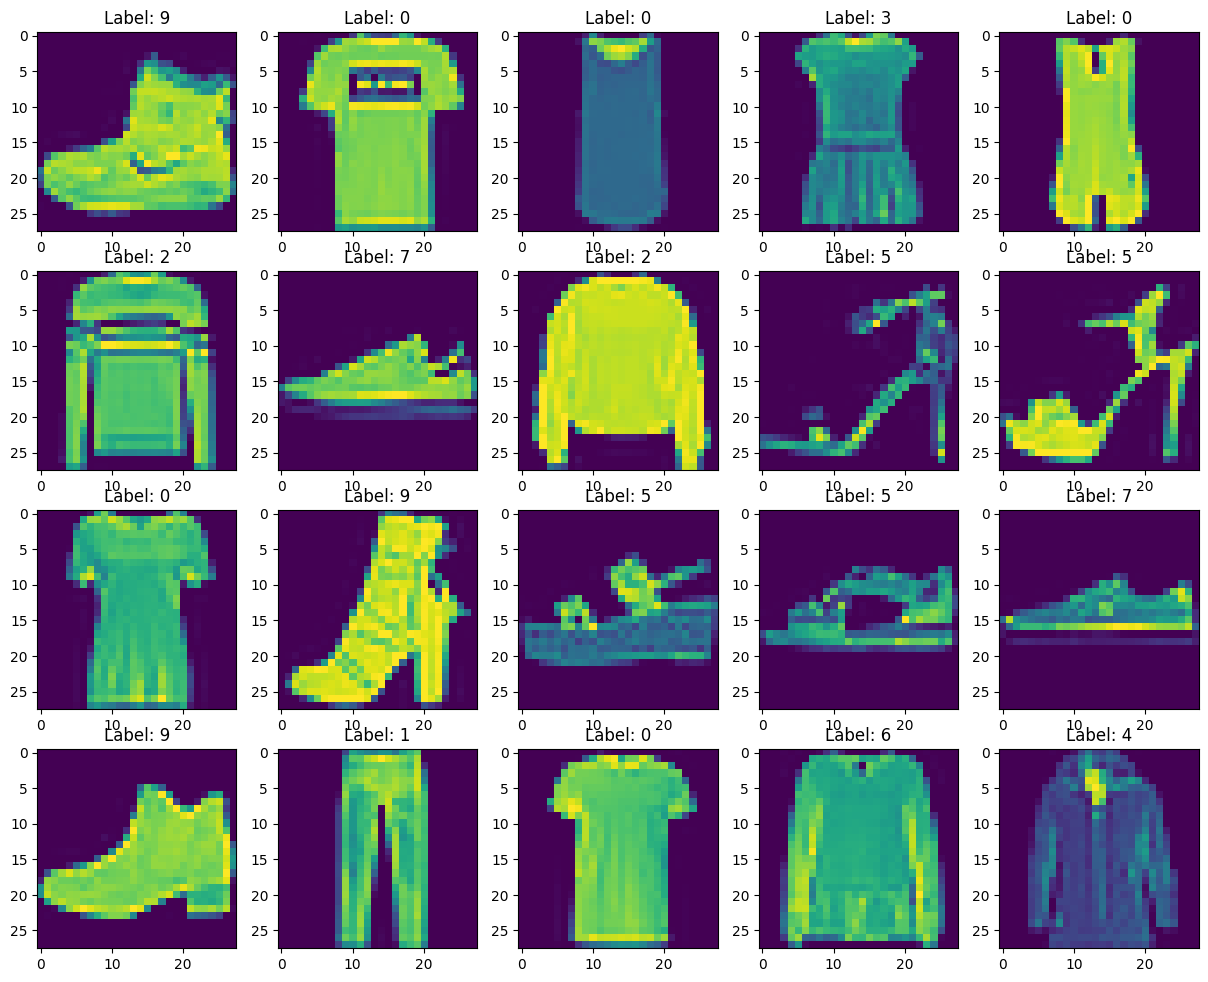

In [64]:
NUM=20
plt.figure(figsize=(15,15))
for idx in range(NUM):
    sp = plt.subplot(5,5, idx+1)
    plt.imshow(image_train[idx])
    plt.title(f'Label: {label_train[idx]}')
plt.show()

In [65]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [70]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'],)
model.fit(image_train, label_train, epochs=20, batch_size=64)
model.summary()
model.save('fashion_mnist.h5')

Epoch 1/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8710 - loss: 0.3620
Epoch 2/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8736 - loss: 0.3467
Epoch 3/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8798 - loss: 0.3369
Epoch 4/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8788 - loss: 0.3323
Epoch 5/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8796 - loss: 0.3308
Epoch 6/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8802 - loss: 0.3352
Epoch 7/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8797 - loss: 0.3254
Epoch 8/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8838 - loss: 0.3145
Epoch 9/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8837 - loss: 0.3140
Epoch 10/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8837 - loss: 0.3160
Epoch 11/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8848 - loss: 0.3193
Epoch 12/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_7 (Flatten)             │ (10, 784)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (10, 128)              │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (10, 64)               │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (10, 10)               │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 328,160 (1.25 MB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 218,774 (854.59 KB)

In [100]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2

model = tf.keras.models.load_model("fashion_mnist.h5")
fashion_mnist = tf.keras.datasets.fashion_mnist
(f_image_train, f_label_train), (f_image_test, f_label_test) = fashion_mnist.load_data()

f_image_train, f_image_test = f_image_train / 255.0, f_image_test /255.0

num=np.random.randint(20)
predict = model.predict(f_image_train[:num])
print(f_label_train[:num])
print(" * Prediction, ", np.argmax(predict, axis=1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
[9 0 0 3 0 2 7 2 5 5 0 9 5 5 7 9 1 0]
 * Prediction,  [5 6 6 6 6 6 6 6 5 5 6 6 5 5 6 6 6 6]


In [27]:
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image

import tensorflow as tf
from tensorflow.keras import datasets, layers, models, Model, Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Flatten, Dense, Input, BatchNormalization, Concatenate, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

mainDIR = os.listdir('./chest_xray')
print(mainDIR)
train_folder = './chest_xray/train/'
val_folder = './chest_xray/val/'
test_folder = './chest_xray/test/'

os.listdir(train_folder)
train_n = train_folder + 'NORMAL/'
train_p = train_folder + 'PNEUMONIA/'

print(len(os.listdir(train_n)))
rand_norm = np.random.randint(0, len(os.listdir(train_n)))
norm_pic = os.listdir(train_n)[rand_norm]
norm_pic_address = train_n + norm_pic

rand_p = np.random.randint(0, len(os.listdir(train_p)))
sic_pic = os.listdir(train_p)[rand_norm]
sic_address = train_p + sic_pic
print('pneumonia picture title:', sic_pic)

['chest_xray', 'test', 'train', 'val', '__MACOSX']
1341
pneumonia picture title: person88_virus_166.jpeg


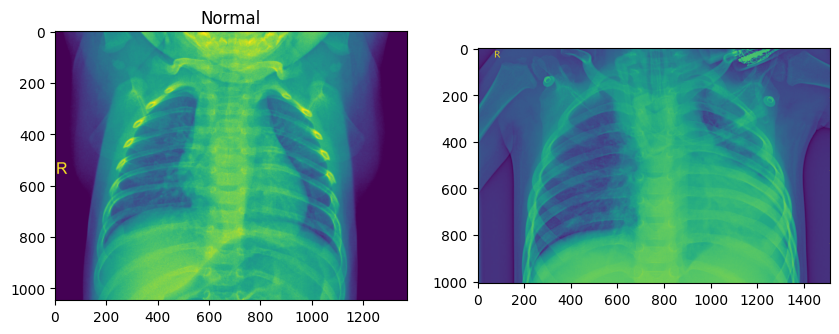

In [28]:
norm_load = Image.open(norm_pic_address)
sic_load = Image.open(sic_address)

f = plt.figure(figsize=(10,6))
a1 = f.add_subplot(1,2,1)
img_plot = plt.imshow(norm_load)
a1.set_title('Normal')

a2=f.add_subplot(1,2,2)
img_plot = plt.imshow(sic_load)
plt.show()

In [33]:
num_of_test_samples = 600
batch_size = 32

train_datagen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('./chest_xray/train', target_size = (64,64), batch_size=32, class_mode='binary')

validation_generator=test_datagen.flow_from_directory('./chest_xray/val/', target_size=(64,64), batch_size=32, class_mode='binary')

test_set = test_datagen.flow_from_directory('./chest_xray/test', target_size=(64,64), batch_size=32, class_mode='binary')



Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [37]:
model_fin = tf.keras.Sequential()
model_fin.add(tf.keras.layers.Flatten())
model_fin.add(tf.keras.layers.Dense(128, activation='relu'))
model_fin.add(tf.keras.layers.Dense(64, activation='relu'))
model_fin.add(tf.keras.layers.Dense(1, activation='sigmoid'))


In [99]:
model_fin.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'],)
modelplot = model_fin.fit(training_set,steps_per_epoch=163, epochs=10, validation_data = test_set, validation_steps=624)
model_fin.summary()
model_fin.save('pneumonia2.keras')

Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 21s 129ms/step - accuracy: 0.9317 - loss: 0.1772 - val_accuracy: 0.8397 - val_loss: 0.4073
Epoch 2/10
  1/163 ━━━━━━━━━━━━━━━━━━━━ 20s 126ms/step - accuracy: 0.9062 - loss: 0.1449

/home/mj/workspace/.venv/lib/python3.10/site-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


163/163 ━━━━━━━━━━━━━━━━━━━━ 21s 126ms/step - accuracy: 0.9321 - loss: 0.1674 - val_accuracy: 0.8830 - val_loss: 0.2787
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 21s 128ms/step - accuracy: 0.9246 - loss: 0.1916 - val_accuracy: 0.8622 - val_loss: 0.3326
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 21s 127ms/step - accuracy: 0.9322 - loss: 0.1615 - val_accuracy: 0.8894 - val_loss: 0.2619
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 21s 128ms/step - accuracy: 0.9241 - loss: 0.1798 - val_accuracy: 0.8510 - val_loss: 0.3559
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 21s 127ms/step - accuracy: 0.9285 - loss: 0.1755 - val_accuracy: 0.8718 - val_loss: 0.3039
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 21s 126ms/step - accuracy: 0.9268 - loss: 0.1851 - val_accuracy: 0.8494 - val_loss: 0.3729
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 21s 127ms/step - accuracy: 0.9314 - loss: 0.1782 - val_accuracy: 0.8894 - val_loss: 0.2691
Epoch 9/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 21s 127ms/step - accuracy: 0.9318 - loss: 0.1703 - val

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_6 (Flatten)             │ (None, 12288)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 128)            │     1,572,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,743,941 (18.10 MB)

 Trainable params: 1,581,313 (6.03 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,162,628 (12.06 MB)

In [109]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pickle

model_fin = tf.keras.models.load_model("pneumonia2.keras")
model_fin.evaluate(test_set)
model_fin.predict(test_set)

history = model_fin.fit(training_set, validation_data = test_set, epochs=10)

with open('model_fin', 'wb') as pf:
    pickle.dump(history.history, pf)

20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step - accuracy: 0.8665 - loss: 0.2861
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step
Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 21s 126ms/step - accuracy: 0.9254 - loss: 0.1840 - val_accuracy: 0.8798 - val_loss: 0.2942
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 20s 125ms/step - accuracy: 0.9199 - loss: 0.1919 - val_accuracy: 0.8462 - val_loss: 0.3810
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 20s 125ms/step - accuracy: 0.9365 - loss: 0.1607 - val_accuracy: 0.8397 - val_loss: 0.3885
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 20s 126ms/step - accuracy: 0.9211 - loss: 0.1891 - val_accuracy: 0.8606 - val_loss: 0.3136
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 21s 126ms/step - accuracy: 0.9276 - loss: 0.1887 - val_accuracy: 0.8654 - val_loss: 0.3048
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 21s 128ms/step - accuracy: 0.9227 - loss: 0.1865 - val_accuracy: 0.8494 - val_loss: 0.3973
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 21s 129ms/step - accuracy: 0.9264 - loss: 0.1761 - val_accur

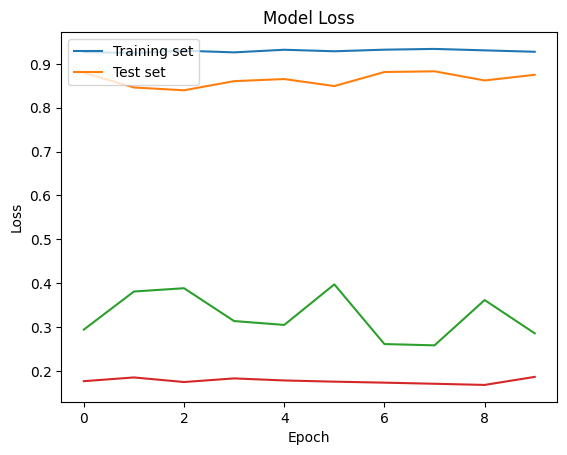

In [110]:
model_fin = tf.keras.models.load_model("pneumonia2.keras")
with open('model_fin', 'rb') as df:
    history = pickle.load(df)

plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training set','Validation set'],loc='upper left')
plt.savefig('train_accuracy.png')

plt.plot(history['val_loss'])
plt.plot(history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training set','Test set'],loc='upper left')
plt.savefig('train_loss.png')
plt.show()